In [1]:
import matplotlib.pyplot as plt
import json

In [15]:
def parse_data(data_list):
    epoch_data = {
        "epochs": [],
        "learning_rates": [],
        "losses": [],
        "steps": []
    }
    eval_data = {
        "epochs": [],
        "eval_losses": [],
        "eval_runtimes": [],
        "eval_samples_per_second": [],
        "eval_steps_per_second": [],
        "steps": []
    }

    for item in data_list:
        if "eval_loss" in item:
            eval_data["epochs"].append(item["epoch"])
            eval_data["eval_losses"].append(item["eval_loss"])
            eval_data["eval_runtimes"].append(item["eval_runtime"])
            eval_data["eval_samples_per_second"].append(item["eval_samples_per_second"])
            eval_data["eval_steps_per_second"].append(item["eval_steps_per_second"])
            eval_data["steps"].append(item["step"])
        else:
            epoch_data["epochs"].append(item["epoch"])
            epoch_data["learning_rates"].append(item.get("learning_rate"))
            epoch_data["losses"].append(item.get("loss"))
            epoch_data["steps"].append(item.get("step"))
    
    return epoch_data, eval_data

In [16]:
with open('./experiments_wiki_4096/checkpoint-100/trainer_state.json') as f:
    data4096 = json.loads(f.read())

In [24]:
with open('./experiments_wiki_6144/checkpoint-100/trainer_state.json') as f:
    data6144 = json.loads(f.read())

In [25]:
epoch_data, eval_data = parse_data(data4096['log_history'])

In [26]:
epoch_data2, eval_data2 = parse_data(data6144['log_history'])

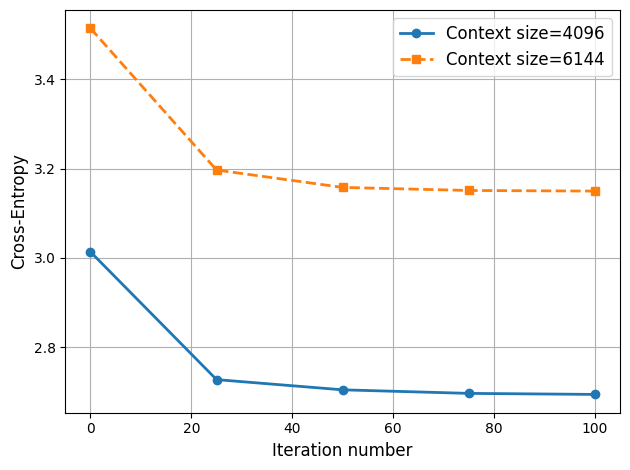

In [34]:
plt.plot(range(0, 101, 25), [epoch_data["losses"][0]]+eval_data['eval_losses'], label='Context size=4096',
         linewidth=2, marker='o', linestyle='-')
plt.plot(range(0, 101, 25), [epoch_data2["losses"][0]]+eval_data2['eval_losses'], label='Context size=6144',
         linewidth=2, marker='s', linestyle='--')
plt.legend(fontsize='large')
plt.xlabel('Iteration number', fontsize='large')
plt.ylabel('Cross-Entropy', fontsize='large')
#plt.plot(epoch_data["losses"])
plt.grid(True)  # Added grid
plt.tight_layout()  # Adjust layout to prevent clipping of labels

In [19]:
eval_data['eval_losses']

[2.7274961471557617, 2.7046282291412354, 2.696659803390503, 2.6943509578704834]

In [14]:
eval_data

{'epochs': [],
 'eval_losses': [],
 'eval_runtimes': [],
 'eval_samples_per_second': [],
 'eval_steps_per_second': [],
 'steps': []}